In [1]:
import warnings
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import RobustScaler as rbScaler 
from sklearn.linear_model import LogisticRegression as lgrClassifier
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/data/train.csv', low_memory=False)
df.shape

Mounted at /content/drive


(100000, 28)

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_count

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13069 entries, 57 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       13069 non-null  int64  
 1   Occupation                13069 non-null  int64  
 2   Annual_Income             13069 non-null  float64
 3   Monthly_Inhand_Salary     13069 non-null  float64
 4   Num_Bank_Accounts         13069 non-null  int64  
 5   Num_Credit_Card           13069 non-null  int64  
 6   Interest_Rate             13069 non-null  int64  
 7   Num_of_Loan               13069 non-null  int64  
 8   Type_of_Loan              13069 non-null  int64  
 9   Delay_from_due_date       13069 non-null  int64  
 10  Num_of_Delayed_Payment    13069 non-null  float64
 11  Changed_Credit_Limit      13069 non-null  float64
 12  Num_Credit_Inquiries      13069 non-null  float64
 13  Credit_Mix                13069 non-null  int64  
 14  Outst

In [6]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_History_Age']

categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score']

In [7]:
irrelavent_coulumns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN']
df.drop(columns=irrelavent_coulumns, inplace=True, axis=1)

In [8]:
df = df.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

In [10]:
def take_years(x):  
    if x is not None:
        return str(x).strip()[0:2]

df.Credit_History_Age=df.Credit_History_Age.apply(take_years)
df['Credit_History_Age'] = df['Credit_History_Age'].replace({'na': np.NaN})

In [9]:
df.Age = df.Age.astype(int)
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Monthly_Balance = df.Monthly_Balance.astype(float)

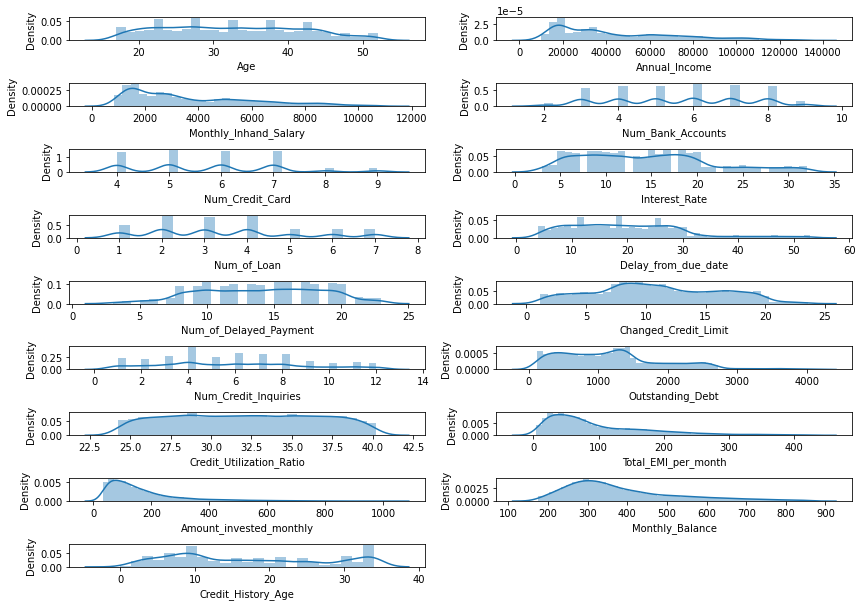

In [32]:
rows=10
cols=2
counter=1
plt.rcParams['figure.figsize']=[12, 9]
for i in num_cols:
    plt.subplot(rows, cols, counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()


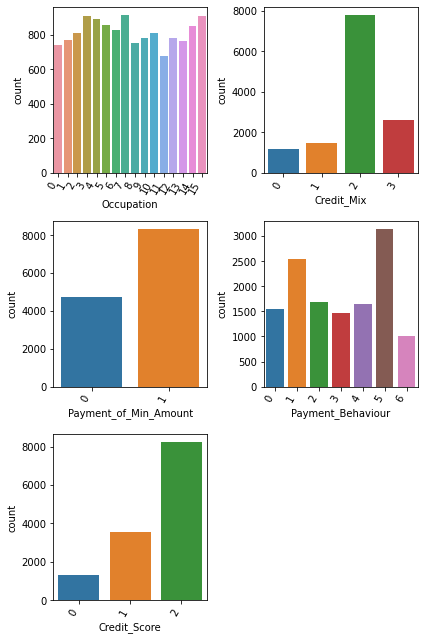

In [33]:
rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[6,9]
for i in categorical_cols:
    plt.subplot(rows,cols,counter)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

In [13]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'NM': 'No'})

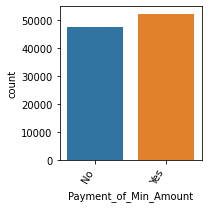

In [14]:
plt.rcParams['figure.figsize'] = [3,3]
sns.countplot(x='Payment_of_Min_Amount', data=df)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [15]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    print(quant_df)
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df = remove_outlier(df)

       Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0.05  16.0        9743.51             836.125833                1.0   
0.95  53.0      134533.32           10828.226500               10.0   

      Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0.05              3.0            2.0          0.0                  3.0   
0.95             10.0           33.0          8.0                 54.0   

      Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0.05                     2.0                  1.16                   0.0   
0.95                    24.0                 23.60                  13.0   

      Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0.05          118.5465                 24.230834             0.000000   
0.95         4073.7605                 40.220207           437.012753   

      Amount_invested_monthly  Monthly_Balance  
0.05                31.893067       174.599433  
0.95            

In [17]:
df.interpolate(method='linear', inplace=True)

In [18]:
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

df['Occupation'] = Occupation_le.fit_transform(df['Occupation'])
df['Type_of_Loan'] = Type_of_Loan_le.fit_transform(df['Type_of_Loan'])
df['Credit_Mix'] = Credit_Mix_le.fit_transform(df['Credit_Mix'])
df['Credit_History_Age'] = Credit_History_Age_le.fit_transform(df['Credit_History_Age'])
df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(df['Payment_Behaviour'])
df['Credit_Score'] = Credit_Score_le.fit_transform(df['Credit_Score'])

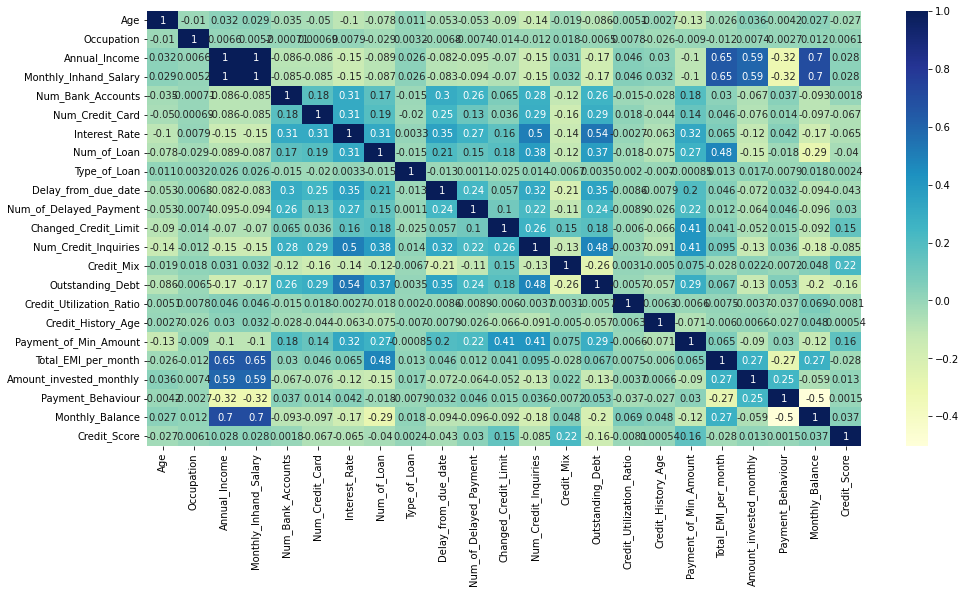

In [34]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr() , annot = True, cmap = "YlGnBu")

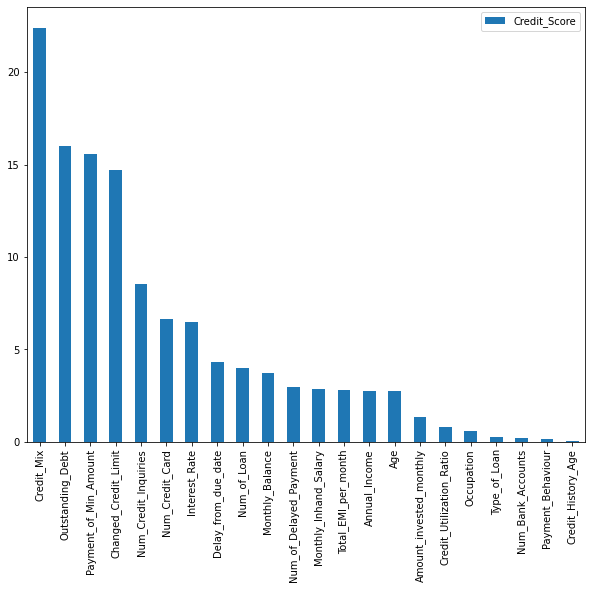

In [20]:
pd.DataFrame(abs(df.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(
    ascending=False)).plot.bar(figsize = (10,8))

In [21]:
round(abs(df.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Credit_Mix                   22.41
Outstanding_Debt             16.01
Payment_of_Min_Amount        15.55
Changed_Credit_Limit         14.70
Num_Credit_Inquiries          8.52
Num_Credit_Card               6.66
Interest_Rate                 6.48
Delay_from_due_date           4.30
Num_of_Loan                   3.98
Monthly_Balance               3.74
Num_of_Delayed_Payment        2.97
Monthly_Inhand_Salary         2.84
Total_EMI_per_month           2.80
Annual_Income                 2.77
Age                           2.75
Amount_invested_monthly       1.34
Credit_Utilization_Ratio      0.81
Occupation                    0.61
Type_of_Loan                  0.24
Num_Bank_Accounts             0.18
Payment_Behaviour             0.15
Credit_History_Age            0.05
Name: Credit_Score, dtype: float64

In [22]:
numeric_cols = df.select_dtypes(exclude = "object").columns

vif_df = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,13.054516
1,Occupation,3.639357
2,Annual_Income,692.661411
3,Monthly_Inhand_Salary,809.153941
4,Num_Bank_Accounts,12.314756
5,Num_Credit_Card,21.596890
6,Interest_Rate,8.780960
7,Num_of_Loan,11.686384
8,Type_of_Loan,3.951536
9,Delay_from_due_date,6.156857


In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
Age,Age,0.0
Num_Credit_Inquiries,Num_Credit_Inquiries,0.0
Monthly_Balance,Monthly_Balance,0.0
Payment_Behaviour,Payment_Behaviour,0.0
Amount_invested_monthly,Amount_invested_monthly,0.0
Total_EMI_per_month,Total_EMI_per_month,0.0
Payment_of_Min_Amount,Payment_of_Min_Amount,0.0
Credit_History_Age,Credit_History_Age,0.0
Credit_Utilization_Ratio,Credit_Utilization_Ratio,0.0
Outstanding_Debt,Outstanding_Debt,0.0


In [24]:
numeric_cols = df.select_dtypes(exclude = "object").columns

vif_df = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,13.054516
1,Occupation,3.639357
2,Annual_Income,692.661411
3,Monthly_Inhand_Salary,809.153941
4,Num_Bank_Accounts,12.314756
5,Num_Credit_Card,21.596890
6,Interest_Rate,8.780960
7,Num_of_Loan,11.686384
8,Type_of_Loan,3.951536
9,Delay_from_due_date,6.156857


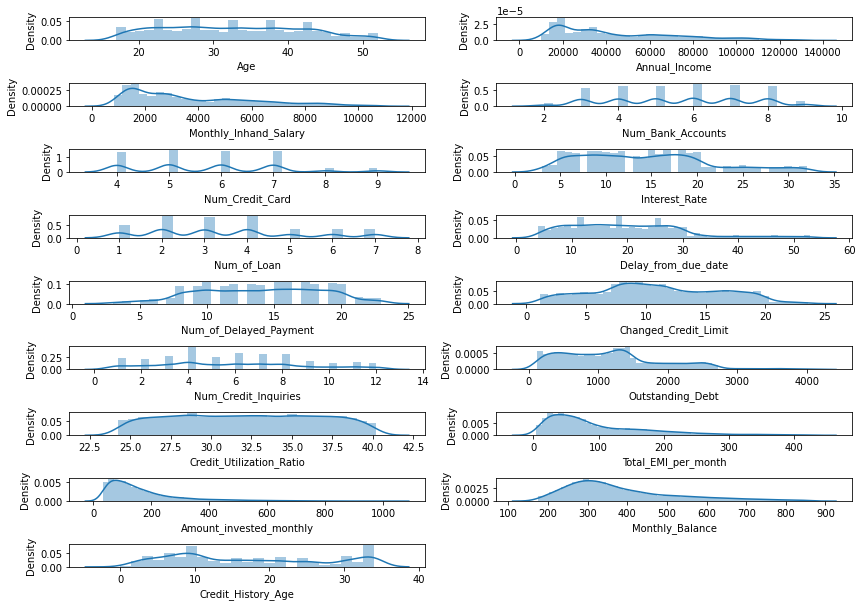

In [36]:
rows=10
cols=2
counter=1
plt.rcParams['figure.figsize']=[12, 9]
for i in num_cols:
    plt.subplot(rows, cols, counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

In [26]:
mdf = df[
    ['Credit_Score','Changed_Credit_Limit',
      'Payment_of_Min_Amount', 'Credit_Mix',
      'Delay_from_due_date', 'Annual_Income',
      'Age', 'Monthly_Balance', 'Outstanding_Debt',
      'Payment_Behaviour', 'Credit_History_Age',
      'Num_Bank_Accounts'
    ]
]

In [27]:
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

[(10455, 11), (10455,), (2614, 11), (2614,)]
Train Score: 0.6983261597321856
Test Score: 0.6866870696250956


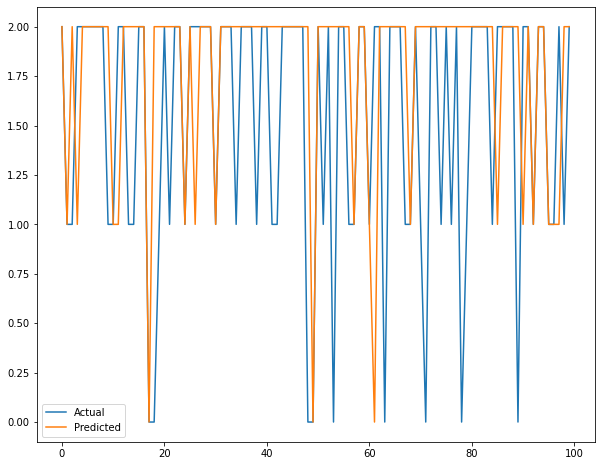

In [28]:
# Data Split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=50)
print([x_train.shape, y_train.shape, x_test.shape, y_test.shape])

# Data Scaling using Robust Scaler
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

# logistic Regression
lgr = lgrClassifier(C = 100)
lgr.fit(x_train , y_train)

lgr_score = lgr.score(x_train , y_train)
lgr_score_t = lgr.score(x_test , y_test)

y_pred1 = lgr.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred1})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

print(f"Train Score: {lgr_score}")
print(f"Test Score: {lgr_score_t}")

In [29]:
print(f"Train Score: {lgr_score}")
print(f"Test Score: {lgr_score_t}")

Train Score: 0.6983261597321856
Test Score: 0.6866870696250956
